In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

df = pd.read_csv(r'C:\Users\singh\Documents\DATA ANALYTICS BOOTCAMP\data_jobs.csv')

# converting the job_posted_date object to datetime
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

# Filtering the data for only the Data analyst and India


In [3]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

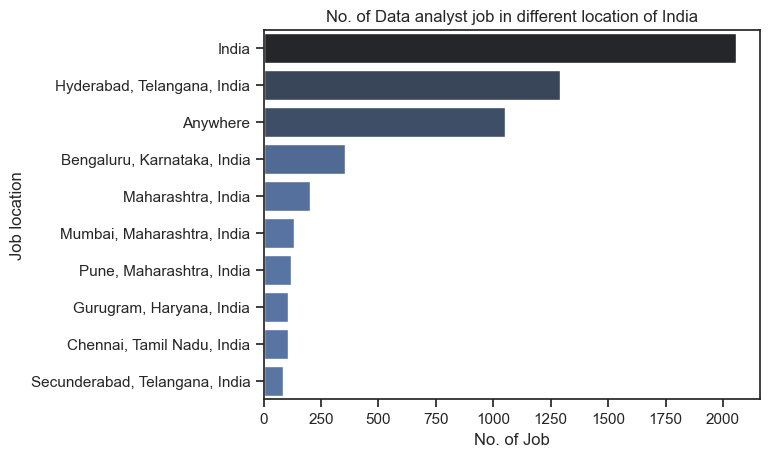

In [23]:
df_plot = df_DA_IN['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')

sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('No. of Data analyst job in different location of India')
plt.ylabel('Job location')
plt.xlabel('No. of Job')
plt.show()

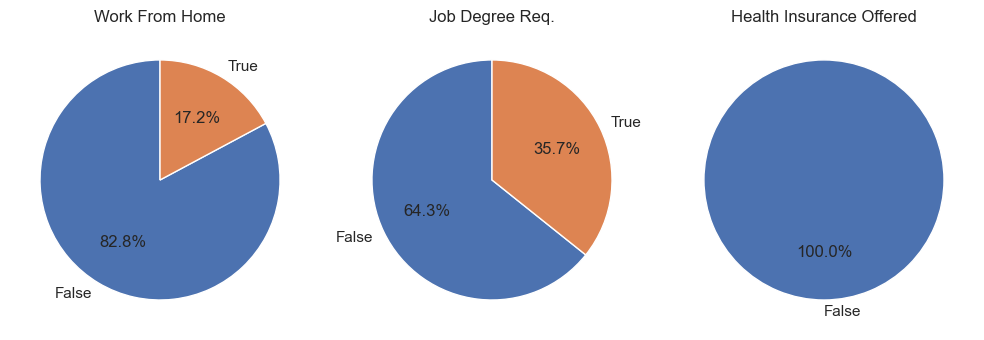

In [29]:
fig, ax = plt.subplots(1,3, figsize = (10,5))

dict_col = {
  'job_work_from_home': 'Work From Home',
  'job_no_degree_mention': 'Job Degree Req.',
  'job_health_insurance': 'Health Insurance Offered'
}

for i, (col, header) in enumerate(dict_col.items()):
  ax[i].pie(df_DA_IN[col].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = df_DA_IN[col].value_counts().index.astype(str))
  ax[i].set_title(header)

fig.tight_layout()

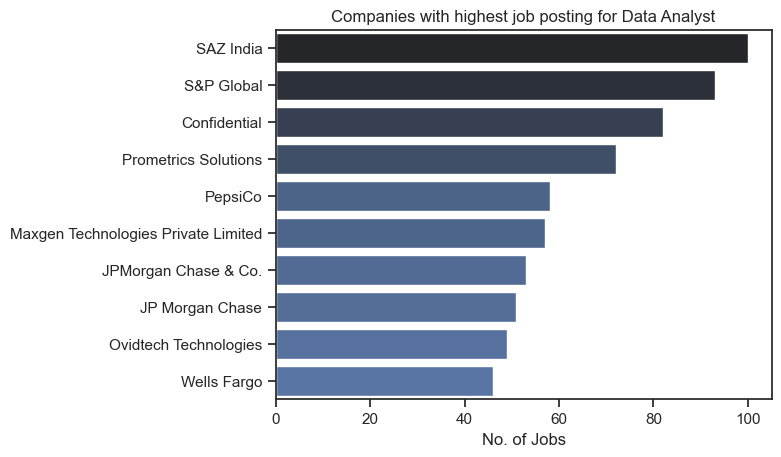

In [32]:
df_plot = df_DA_IN['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')

sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', palette = 'dark:b_r', legend = False)
plt.title('Companies with highest job posting for Data Analyst')
plt.ylabel('')
plt.xlabel('No. of Jobs')
plt.show()